1. Create the following data set for two independent variable (X1,X2) and one dependent variable (Y) in CSV.

Apply the Logistic Regression to perform the following.
a. Calculate the coefficients (B0, B1 and B2).

b. Apply the sigmoid function to get the prediction and calculate error.

c. From the predicted values calculate the accuracy.

d. List the model parameters along with error for every instance of the training data.

e. Plot the graph of B1 v/s error and B2 v/s error.

f. Use scikit learn model to repeat the above steps and compare the results.

1a

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import copy 

In [23]:
x_train = np.array([[2.781084,2.550537],[1.465489,2.362125],[3.396562,4.400294],[1.38807,1.85022],[3.064072,3.005306],[7.627531,2.759262],[5.332441,2.088627
],[6.922597,1.771064],[8.675419,-0.24207],[7.673756,3.508563]])
y_train = np.array([0,0,0,0,0,1,1,1,1,1])

In [24]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

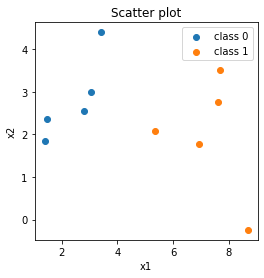

In [25]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
for i in range(2):
    ax.scatter(x_train[y_train == i,0],x_train[y_train == i,1],label=f'class {i}')
ax.set_title('Scatter plot')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
plt.show()

In [26]:
def compute_error(x,y,w,b):
    m = x.shape[0]
    cost  = 0.0
    for i in range(m):
        z_i = np.dot(w,x[i]) + b
        f_wb_i = sigmoid(z_i)
        cost += -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
    cost = cost/m
    return cost

In [27]:
def compute_gradient_logistic(x,y,w,b):
    m,n = x.shape
    dj_dw = np.zeros(n)
    dj_db = 0.0
    for i in range(m):
        f_wb_i = sigmoid(np.dot(x[i],w)+b)
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * x_train[i,j]
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_db,dj_dw


In [28]:
def gradient_descent(x, y, w_in, b_in, alpha, iters):
    J_hist = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(iters):
        dj_db, dj_dw = compute_gradient_logistic(x, y, w, b)
        w, b = w - alpha * dj_dw, b - alpha * dj_db
        if i % np.ceil(iters / 10) == 0:
            J_hist.append(compute_error(x, y, w, b))
            print(f"Iteration {i:4d}: Cost {J_hist[-1]}")
    return w, b, J_hist



In [29]:
w_tmp,b_tmp,alpha,iters = np.zeros_like(x_train[0]),0.,0.1,10000
w_out,b_out,_ = gradient_descent(x_train,y_train,w_tmp,b_tmp,alpha,iters)
print(f"\n Updated paramters: w:{w_out}, b:{b_out}")


Iteration    0: Cost 0.5899089190774951
Iteration 1000: Cost 0.010442415926494874
Iteration 2000: Cost 0.005410392831308964
Iteration 3000: Cost 0.003670337240731315
Iteration 4000: Cost 0.0027837236378305155
Iteration 5000: Cost 0.0022450919938389264
Iteration 6000: Cost 0.0018827008555337519
Iteration 7000: Cost 0.0016219859051612696
Iteration 8000: Cost 0.00142530035744113
Iteration 9000: Cost 0.001271566837911911

 Updated paramters: w:[ 3.47127965 -5.09661097], b:-2.010646344089232


1b

In [30]:
def predict(x,w,b):
    z  = np.dot(x,w) + b
    return sigmoid(z) 

In [31]:
y_pred = predict(x_train,w_out,b_out)
error = compute_error(x_train,y_train,w_out,b_out)
print(f"Error:{error}")

Error:0.0011481692222956449


1c

In [32]:
print(y_pred)


def calculate_accuracy(y_true, y_pred):

    y_pred_binary = np.round(y_pred)

 
    accuracy = np.mean(y_true == y_pred_binary) * 100
    return accuracy


accuracy = calculate_accuracy(y_train, y_pred)
print(f"Accuracy: {accuracy:.2f}%")


[4.69841345e-03 1.28127521e-04 3.21777738e-06 1.32884056e-03
 1.24016353e-03 9.99969683e-01 9.97142163e-01 9.99997724e-01
 1.00000000e+00 9.98825017e-01]
Accuracy: 100.00%


1d

In [33]:
def calculate_error_for_instance(x, y, w, b):
    z = np.dot(x, w) + b
    f_wb = sigmoid(z)
    error = -y * np.log(f_wb) - (1 - y) * np.log(1 - f_wb)
    return error

for i, x_instance in enumerate(x_train):
    error_instance = calculate_error_for_instance(x_instance, y_train[i], w_out, b_out)
    print(f"Instance {i + 1}:")
    print(f"  Model Parameters - B0: {b_out}, B1: {w_out[0]}, B2: {w_out[1]}")
    print(f"  Error: {error_instance}")


Instance 1:
  Model Parameters - B0: -2.010646344089232, B1: 3.4712796540896265, B2: -5.096610974920143
  Error: 0.004709485692582837
Instance 2:
  Model Parameters - B0: -2.010646344089232, B1: 3.4712796540896265, B2: -5.096610974920143
  Error: 0.00012813573031483707
Instance 3:
  Model Parameters - B0: -2.010646344089232, B1: 3.4712796540896265, B2: -5.096610974920143
  Error: 3.2177825593817292e-06
Instance 4:
  Model Parameters - B0: -2.010646344089232, B1: 3.4712796540896265, B2: -5.096610974920143
  Error: 0.0013297242508227038
Instance 5:
  Model Parameters - B0: -2.010646344089232, B1: 3.4712796540896265, B2: -5.096610974920143
  Error: 0.0012409331709637944
Instance 6:
  Model Parameters - B0: -2.010646344089232, B1: 3.4712796540896265, B2: -5.096610974920143
  Error: 3.031775649402906e-05
Instance 7:
  Model Parameters - B0: -2.010646344089232, B1: 3.4712796540896265, B2: -5.096610974920143
  Error: 0.0028619283857827284
Instance 8:
  Model Parameters - B0: -2.01064634408923

1e

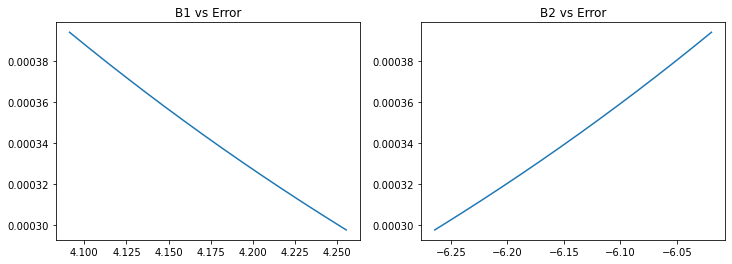

Equation: y = -2.471683191257787 + 4.2552277139019035*x1 + -6.264204059895222*x2
Predicted values:  [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


In [37]:
b1s = []
b2s = []
errors = []

for i in range(iters):
    b1s.append(w_out[0])
    b2s.append(w_out[1])
    errors.append(compute_error(x_train, y_train, w_out, b_out))
    dj_db, dj_dw = compute_gradient_logistic(x_train, y_train, w_out, b_out)
    w_out = w_out - alpha * dj_dw
    b_out = b_out - alpha * dj_db

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(b1s, errors)
plt.title("B1 vs Error")

plt.subplot(1, 2, 2)
plt.plot(b2s, errors)
plt.title("B2 vs Error")

accuracy = []
for i in range(iters):
    output = sigmoid(np.dot(x_train, w_out) + b_out)
    predictions = (output >= 0.5).astype(int)
    accuracy.append(np.mean(predictions == y_train))



plt.show()


b0 = b_out
b1 = w_out[0]
b2 = w_out[1]

print(f"Equation: y = {b0} + {b1}*x1 + {b2}*x2")

npx1, npx2 = np.array(x_train).T
npy = b0 + b1 * npx1 + b2 * npx2
output = sigmoid(npy)
func = lambda x: 0 if x < 0.5 else 1
prediction = list(map(func, output))
print("Predicted values: ", prediction)

1f

In [41]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0).fit(x_train,y_train)
y_pred = classifier.predict(x_train)
print(f"Slope:{classifier.coef_}\nIntercepts:{classifier.intercept_}")


Slope:[[ 1.18383416 -0.35803503]]
Intercepts:[-4.55163352]


2. Use above data set for one independent variable (X=X1) and one dependent variable (Y) in CSV.

Applying Logistic Regression, explore the relationship between independent and dependent variables.

a. Calculate the coefficients (B0, and B1).

b. Apply the sigmoid function to get the prediction and calculate error.

c. From the predicted values calculate the accuracy.

d. List the model parameters along with error for every instance of the training data.

e. Plot the graph of B1 v/s error.

f. Visualize the following binary cross entropy function for logistic regression using the above training data.Plot y=1 and y=0 cases separately, and then plot the combined graph by considering X in X-axis and cost in Y-axis.

2a

In [50]:
import numpy as np
import pandas as pd


df = pd.read_csv('data.csv')
x = np.array(df['X1'])  
y = np.array(df['Y'])   


def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

def compute_error(x, y, w, b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = w * x[i] + b
        f_wb_i = sigmoid(z_i)
        cost += -y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i)
    cost = cost / m
    return cost


def compute_gradient_logistic(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0.0
    dj_db = 0.0
    for i in range(m):
        f_wb_i = sigmoid(w * x[i] + b)
        err_i = f_wb_i - y[i]
        dj_dw += err_i * x[i]
        dj_db += err_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_db, dj_dw


def gradient_descent(x, y, w_in, b_in, alpha, iters):
    J_hist = []
    w = w_in
    b = b_in
    for i in range(iters):
        dj_db, dj_dw = compute_gradient_logistic(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        if i % np.ceil(iters / 10) == 0:
            J_hist.append(compute_error(x, y, w, b))
            print(f"Iteration {i:4d}: Cost {J_hist[-1]}")
    return w, b, J_hist


w_tmp = 0.0 
b_tmp = 0.0  
alpha = 0.1  
iters = 10000  


w_out, b_out, _ = gradient_descent(x, y, w_tmp, b_tmp, alpha, iters)
print(f"\nUpdated parameters: B1: {w_out}, B0: {b_out}")


Iteration    0: Cost 0.6007179812224619
Iteration 1000: Cost 0.08726349238054493
Iteration 2000: Cost 0.05399321917120423
Iteration 3000: Cost 0.04025638393933364
Iteration 4000: Cost 0.03242109327257473
Iteration 5000: Cost 0.027266530226084405
Iteration 6000: Cost 0.023586215118344547
Iteration 7000: Cost 0.020813523309983123
Iteration 8000: Cost 0.018643233601989488
Iteration 9000: Cost 0.016894944807618103

Updated parameters: B1: 2.8829080677658205, B0: -12.5659123210753


2b

In [52]:
def predict(x,w,b):
    z  = np.dot(x,w) + b
    return sigmoid(z) 
y_pred = predict(x_train,w_out,b_out)
error = compute_error(x,y,w_out,b_out)
print(f"Error:{error}")


Error:0.01545591502183855


2c

In [65]:

def predict(x, w, b):
    z = w * x + b
    return sigmoid(z)

predicted_values = predict(x, w_out, b_out)

threshold = 0.5
binary_predictions = (predicted_values >= threshold).astype(int)

accuracy = np.mean(binary_predictions == y)

print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


2d

In [69]:
import numpy as np
import pandas as pd


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def logistic_regression(x, w, b):
    return sigmoid(w * x + b)


df = pd.read_csv('data.csv')
x = np.array(df['X1'])
y = np.array(df['Y'])


w = 0.0
b = 0.0


alpha = 0.1
iters = 10000


def compute_error(y_true, y_pred):
    error = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return error

individual_errors = []

for i in range(iters):
    y_pred = logistic_regression(x, w, b)
    error = compute_error(y, y_pred)
    
 
    dw = np.sum((y_pred - y) * x) / len(y)
    db = np.sum(y_pred - y) / len(y)
    w -= alpha * dw
    b -= alpha * db
    

    individual_errors.append(error)


for j in range(len(x)):
    print(f"Instance {j + 1}: B0={b:.4f}, B1={w:.4f}, Error={individual_errors[j][0]:.4f}")

final_error = np.mean(individual_errors)

print(f"Final Model Parameters: B0={b:.4f}, B1={w:.4f}, Final Error={final_error:.4f}")


Instance 1: B0=-12.5659, B1=2.8829, Error=0.6931
Instance 2: B0=-12.5659, B1=2.8829, Error=0.8750
Instance 3: B0=-12.5659, B1=2.8829, Error=0.9247
Instance 4: B0=-12.5659, B1=2.8829, Error=0.9405
Instance 5: B0=-12.5659, B1=2.8829, Error=0.9440
Instance 6: B0=-12.5659, B1=2.8829, Error=0.9423
Instance 7: B0=-12.5659, B1=2.8829, Error=0.9383
Instance 8: B0=-12.5659, B1=2.8829, Error=0.9333
Instance 9: B0=-12.5659, B1=2.8829, Error=0.9279
Instance 10: B0=-12.5659, B1=2.8829, Error=0.9223
Final Model Parameters: B0=-12.5659, B1=2.8829, Final Error=0.0464


2e

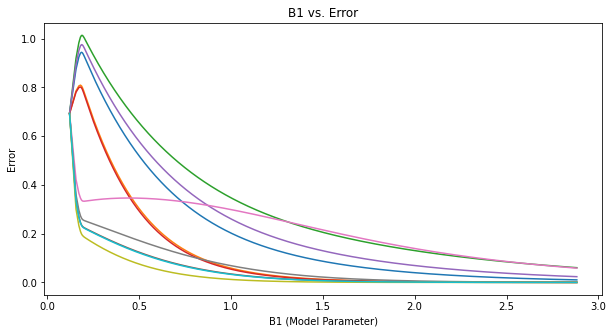

Final Model Parameters: B0=-12.5659, B1=2.8829, Final Error=0.0464


In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def logistic_regression(x, w, b):
    return sigmoid(w * x + b)

df = pd.read_csv('data.csv')
x = np.array(df['X1'])
y = np.array(df['Y'])

w = 0.0
b = 0.0


alpha = 0.1
iters = 10000

def compute_error(y_true, y_pred):
    error = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return error


individual_errors = []
b1_values = []


for i in range(iters):
    y_pred = logistic_regression(x, w, b)
    error = compute_error(y, y_pred)
    

    dw = np.sum((y_pred - y) * x) / len(y)
    db = np.sum(y_pred - y) / len(y)
    w -= alpha * dw
    b -= alpha * db
    

    individual_errors.append(error)
    

    b1_values.append(w)

# Plot B1 versus error
plt.figure(figsize=(10, 5))
plt.plot(b1_values, individual_errors)
plt.xlabel('B1 (Model Parameter)')
plt.ylabel('Error')
plt.title('B1 vs. Error')
plt.show()

final_error = np.mean(individual_errors)

print(f"Final Model Parameters: B0={b:.4f}, B1={w:.4f}, Final Error={final_error:.4f}")


2f

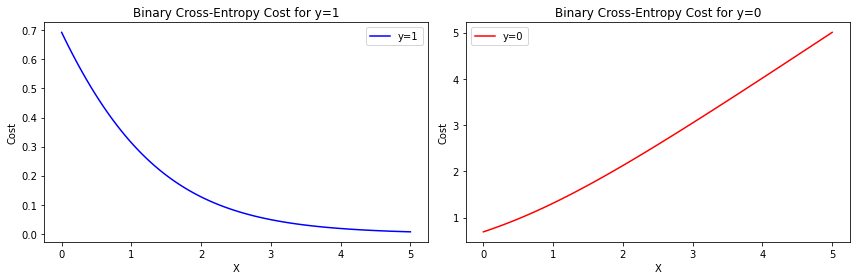

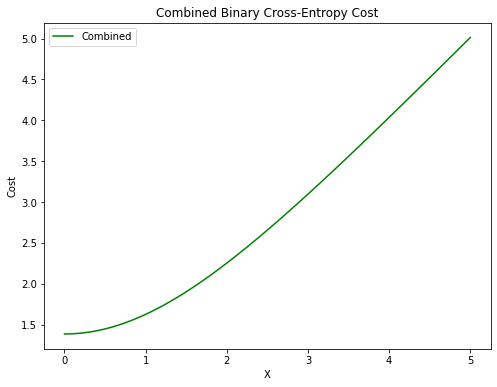

In [71]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy(y_true, y_pred):
    return -((y_true * np.log(y_pred)) + ((1 - y_true) * np.log(1 - y_pred)))


X_range = np.linspace(0, 5, 100)


cost_y1 = []
cost_y0 = []


for X in X_range:

    y_true_y1 = 1
    y_pred_y1 = sigmoid(X)
    cost_y1.append(binary_cross_entropy(y_true_y1, y_pred_y1))
    

    y_true_y0 = 0
    y_pred_y0 = sigmoid(X)
    cost_y0.append(binary_cross_entropy(y_true_y0, y_pred_y0))


combined_cost = np.array(cost_y1) + np.array(cost_y0)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(X_range, cost_y1, label='y=1', color='blue')
plt.xlabel('X')
plt.ylabel('Cost')
plt.title('Binary Cross-Entropy Cost for y=1')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(X_range, cost_y0, label='y=0', color='red')
plt.xlabel('X')
plt.ylabel('Cost')
plt.title('Binary Cross-Entropy Cost for y=0')
plt.legend()

plt.tight_layout()

plt.figure(figsize=(8, 6))
plt.plot(X_range, combined_cost, label='Combined', color='green')
plt.xlabel('X')
plt.ylabel('Cost')
plt.title('Combined Binary Cross-Entropy Cost')
plt.legend()
plt.show()


2g

Model Parameters - B0: -0.3852536086718334, B1: 0.7716146358873378, B2: -1.0562713503622096
Accuracy: 100.00%


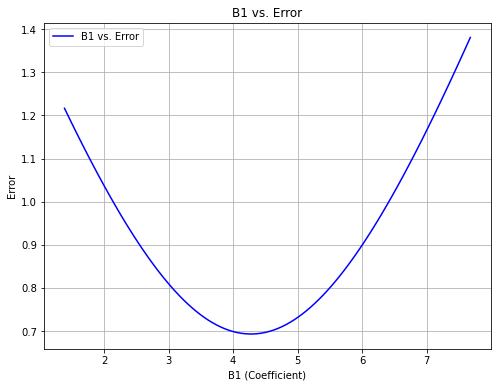

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv('data.csv')
X = np.array(df[['X1', 'X2']])  
y = np.array(df['Y'])           


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)


b1 = model.coef_[0][0]
b2 = model.coef_[0][1]
b0 = model.intercept_[0]


print(f"Model Parameters - B0: {b0}, B1: {b1}, B2: {b2}")


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


X1_range = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
errors = []

for x1 in X1_range:
    X_temp = np.array([[x1, X_train[0][1]]])  
    error = -np.mean(y_train * np.log(model.predict_proba(X_temp)[:, 1]) + (1 - y_train) * np.log(1 - model.predict_proba(X_temp)[:, 1]))
    errors.append(error)

plt.figure(figsize=(8, 6))
plt.plot(X1_range, errors, label='B1 vs. Error', color='blue')
plt.xlabel('B1 (Coefficient)')
plt.ylabel('Error')
plt.title('B1 vs. Error')
plt.legend()
plt.grid()
plt.show()


3. Use the above data set for two independent variable (X1,X2) and one dependent variable (Y) in CSV.
Apply the Logistic Regression with SGD to perform the following.

a. Calculate the coefficients (B0, B1 and B2) and arrive at different values of B0, B1, B2, and error for 50
iterations of 5 epochs.

b. Apply the sigmoid function to get the prediction and calculate error.

c. From the predicted values calculate the accuracy.

d. Plot the graph of epoch (X-axis) v/s Accuracy (Y-axis).

f. Use scikit learn model to repeat the above steps and compare the results.

After epoch 50 : b0 = -0.06779638193433425 b1 = 0.23187789021939417 b2 = -0.247055107795964  Error =  0.3054719084174652
After epoch 100 : b0 = -0.13007145259797082 b1 = 0.33723823045623713 b2 = -0.43483548763494406  Error =  0.28679761671246096
After epoch 150 : b0 = -0.17894877820164246 b1 = 0.4207982565786149 b2 = -0.5718779979436501  Error =  0.26402259731027355
After epoch 200 : b0 = -0.21915934827912514 b1 = 0.48852192461750504 b2 = -0.6794773444045387  Error =  0.2442771774512441
After epoch 250 : b0 = -0.25325644126653457 b1 = 0.5450367182871507 b2 = -0.7678416313304619  Error =  0.22780701128351277
Equation: y = -0.25325644126653457 + 0.5450367182871507 *x1 -0.7678416313304619 *x2
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


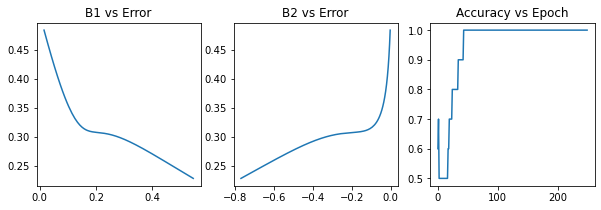

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tab = pd.read_csv("data.csv")
x1 = tab.iloc[:,:-2]
x2 = tab.iloc[:,-2:-1]
y = tab.iloc[:,-1]
npx1 = np.array(x1)
npx2 = np.array(x2)
npy = np.array(y)

b0,b1,b2 = 0,0,0
learning_rate = 0.005

def sigmoid(z):
    sig = 1/(1+np.exp(-z))
    return sig

epochs = 250
accuracy,b0s,b1s,b2s,errors = [],[],[],[],[]
for epoch in range(0,epochs):
    correct = 0
    for i in range(len(x1)):
        output = b0 + b1*npx1[i] + b2*npx2[i]
        pred = sigmoid(output)
        diff = npy[i] - pred
        b0 = b0 + learning_rate * (diff) * pred * (1-pred)
        b1 = b1 + learning_rate * (diff) * pred * (1-pred) * npx1[i]
        b2 = b2 + learning_rate * (diff) * pred * (1-pred) * npx2[i]
        b0,b1,b2 = b0[0],b1[0],b2[0]
        if (pred<0.5 and npy[i] == 0) or (pred>=0.5 and npy[i] == 1):
            correct += 1
    accuracy.append(correct/len(npx1)) 
    b0s.append(b0)
    b1s.append(b1)
    b2s.append(b2)
    errors.append(diff)
    if (epoch+1)%50 == 0:
        print("After epoch",epoch+1,": b0 =",b0,"b1 =",b1,"b2 =",b2," Error = ",diff[0])

plt.figure(figsize = (10,3))
plt.subplot(1,3,1)
plt.plot(b1s,errors),plt.title("B1 vs Error")
plt.subplot(1,3,2)
plt.plot(b2s,errors),plt.title("B2 vs Error")

plt.subplot(1,3,3)
plt.plot(np.arange(250),accuracy)
plt.title("Accuracy vs Epoch")
print("Equation: y =",b0,"+",b1,"*x1",b2,"*x2")
npy = b0 + b1*npx1 + b2*npx2
output = sigmoid(npy)
func = lambda x: 0 if x<0.5 else 1
prediction = list(map(func,output))
print(prediction)